In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns  # For plotting correlation heatmap
import joblib

## Prepare dataset 

In [2]:
# 1. Load data
file_path = 'E:/Folu Net Sink 2030/Lidar Gedi/gedi_sentinel1_extracted_values/gedi_sentinel2_extracted_values.csv'
data = pd.read_csv(file_path, sep=';')
data

,new_attrib,fid,date,B11,B12,agbd,MSK_CLDPRB,layer,B2,B3,...,B4,B5,lat_lowest,B6,B7,B8,lon_lowest,VV,VH,angle
0,03/05/2019,1,1.556840e+12,NaN,NaN,10.299632,NaN,GEDI04_A_20190503_2019123032136_O02194_04_T045...,NaN,NaN,...,NaN,NaN,-0.745737,NaN,NaN,NaN,116.890712,-8.723801,-15.847018,36.684093
1,03/05/2019,2,1.556840e+12,NaN,NaN,11.244361,NaN,GEDI04_A_20190503_2019123032136_O02194_04_T045...,NaN,NaN,...,NaN,NaN,-0.746180,NaN,NaN,NaN,116.890978,-6.801365,-13.817563,36.682808
2,03/05/2019,3,1.556840e+12,NaN,NaN,21.002218,NaN,GEDI04_A_20190503_2019123032136_O02194_04_T045...,NaN,NaN,...,NaN,NaN,-0.746622,NaN,NaN,NaN,116.891244,-7.693880,-16.705975,36.681526
3,03/05/2019,4,1.556840e+12,NaN,NaN,10.138819,NaN,GEDI04_A_20190503_2019123032136_O02194_04_T045...,NaN,NaN,...,NaN,NaN,-0.747063,NaN,NaN,NaN,116.891509,-9.159604,-18.787155,36.680248
4,03/05/2019,5,1.556840e+12,NaN,NaN,10.102147,NaN,GEDI04_A_20190503_2019123032136_O02194_04_T045...,NaN,NaN,...,NaN,NaN,-0.747504,NaN,NaN,NaN,116.891775,-8.107211,-14.260855,36.678974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43243,22/01/2023,43244,1.674350e+12,NaN,NaN,82.414917,NaN,GEDI04_A_20230122_2023022165349_O23291_04_T102...,NaN,NaN,...,NaN,NaN,-0.827226,NaN,NaN,NaN,116.891122,-10.289781,-17.105918,36.219677
43244,22/01/2023,43245,1.674350e+12,NaN,NaN,185.109634,NaN,GEDI04_A_20230122_2023022165349_O23291_04_T102...,NaN,NaN,...,NaN,NaN,-0.827650,NaN,NaN,NaN,116.891422,-3.547798,-11.572578,36.217567
43245,22/01/2023,43246,1.674350e+12,NaN,NaN,179.507996,NaN,GEDI04_A_20230122_2023022165349_O23291_04_T102...,NaN,NaN,...,NaN,NaN,-0.828073,NaN,NaN,NaN,116.891719,-4.294481,-11.780784,36.215881
43246,22/01/2023,43247,1.674350e+12,NaN,NaN,46.767803,NaN,GEDI04_A_20230122_2023022165349_O23291_04_T102...,NaN,NaN,...,NaN,NaN,-0.828496,NaN,NaN,NaN,116.892017,-4.296510,-10.242908,36.214291


In [5]:
# 2. Feature selection (Variabel bebas) and target (Variabel terikat)
features = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B11', 'B12', 'VV', 'VH']
target = 'agbd'

In [6]:
# Drop rows with missing values in features and target
data = data.dropna(subset=features + [target])

In [7]:
# definisikan fitur X dan Y
X = data[features]
y = data[target]

In [8]:
# 3. Uji Normalitas (Shapiro-Wilk) pada setiap fitur
print("\nUji Normalitas (Shapiro-Wilk):")
for feature in features:
    stat, p_value = stats.shapiro(X[feature])
    print(f"{feature}: p-value = {p_value:.5f} (Normal if p > 0.05)")


Uji Normalitas (Shapiro-Wilk):
B2: p-value = 0.00000 (Normal if p > 0.05)
B3: p-value = 0.00000 (Normal if p > 0.05)
B4: p-value = 0.00000 (Normal if p > 0.05)
B5: p-value = 0.00000 (Normal if p > 0.05)
B6: p-value = 0.00000 (Normal if p > 0.05)
B7: p-value = 0.00000 (Normal if p > 0.05)
B8: p-value = 0.00000 (Normal if p > 0.05)
B11: p-value = 0.00000 (Normal if p > 0.05)
B12: p-value = 0.00000 (Normal if p > 0.05)
VV: p-value = 0.00000 (Normal if p > 0.05)
VH: p-value = 0.00000 (Normal if p > 0.05)


c:\Users\asus\anaconda3\envs\marzuki\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12362.
  res = hypotest_fun_out(*samples, **kwds)



Uji Korelasi (Pearson) antara fitur dan target:
B2 vs agbd: -0.12380
B3 vs agbd: -0.12853
B4 vs agbd: -0.12933
B5 vs agbd: -0.13105
B6 vs agbd: -0.09757
B7 vs agbd: -0.07684
B8 vs agbd: -0.05680
B11 vs agbd: -0.15537
B12 vs agbd: -0.16837
VV vs agbd: 0.13503
VH vs agbd: 0.13434


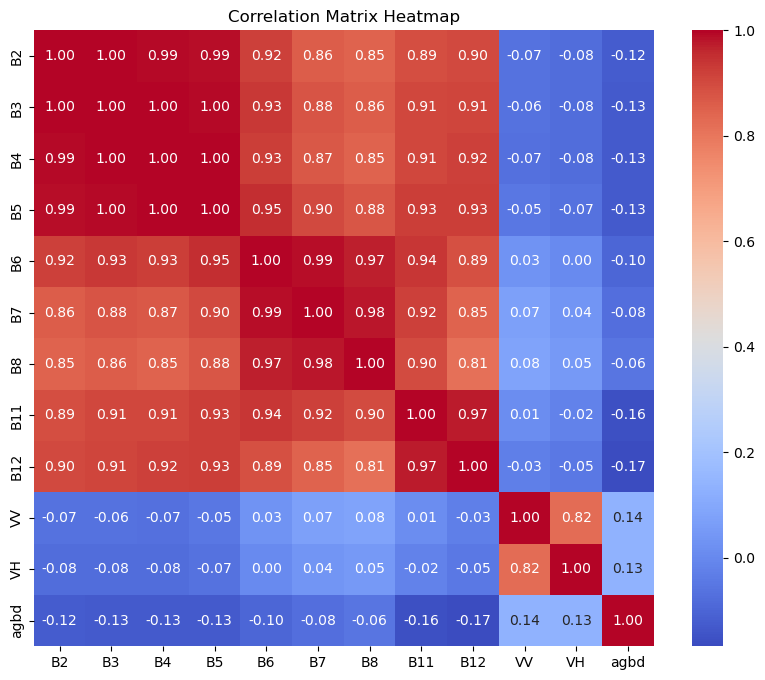

In [9]:
# 4. Uji Korelasi (Pearson) antara fitur dan target (agbd)
print("\nUji Korelasi (Pearson) antara fitur dan target:")
correlations = {}
for feature in features:
    corr, _ = stats.pearsonr(X[feature], y)
    correlations[feature] = corr
    print(f"{feature} vs {target}: {corr:.5f}")

# Optional: Plot heatmap of correlations
correlation_matrix = data[features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
# 5. Split data into train and test (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

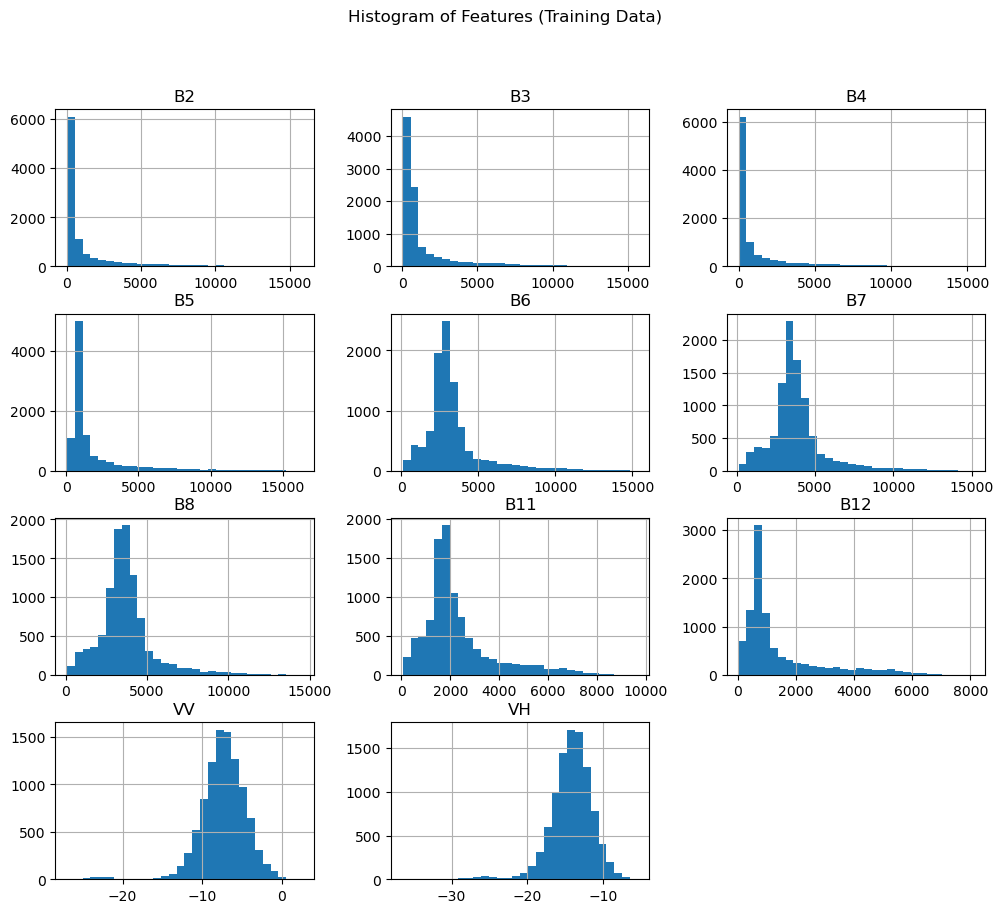

In [11]:
# Plot histograms to visually inspect normality
X_train.hist(bins=30, figsize=(12, 10))
plt.suptitle("Histogram of Features (Training Data)")
plt.show()

## Multivariate Linear Regression

In [12]:
# 1. Fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
# 2. Print the regression equation
coefficients = regressor.coef_
intercept = regressor.intercept_

# Persamaan regresi
equation = "agbd = " + " + ".join([f"({coeff})*{feature}" for coeff, feature in zip(coefficients, features)]) + f" + ({intercept})"
print("\nPersamaan Regresi:")
print(equation)


Persamaan Regresi:
agbd = (0.1438215216537715)*B2 + (-0.372371743611097)*B3 + (0.2571055192105358)*B4 + (-0.05163443870977902)*B5 + (-0.01560246061933683)*B6 + (0.020787712882069667)*B7 + (0.056705906446975374)*B8 + (-0.059142507778250406)*B11 + (0.01455136872749238)*B12 + (1.5327600152669436)*VV + (2.2548473466918892)*VH + (175.91793836365463)


In [14]:
# 3. Predicting on test data
y_pred_linear = regressor.predict(X_test)

In [15]:
# 4. Evaluate performance of each model
def evaluate_performance(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    bias = np.mean(y_pred - y_test)
    print(f"\nPerformance of {model_name}:")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"Bias: {bias}")
    return r2, mae, rmse, bias

evaluate_performance(y_test, y_pred_linear, "Multivariare_linear_regression")


Performance of Multivariare_linear_regression:
R²: 0.1134
MAE: 78.9192
RMSE: 112.5108
Bias: 0.5759210025708545


(0.11336880878048328, 78.91921289167297, 112.5107792561714, 0.5759210025708545)

In [16]:
# 5. Save model
joblib.dump(regressor, 'linear_model_gedi_sentinel.joblib')

['linear_model_gedi_sentinel.joblib']

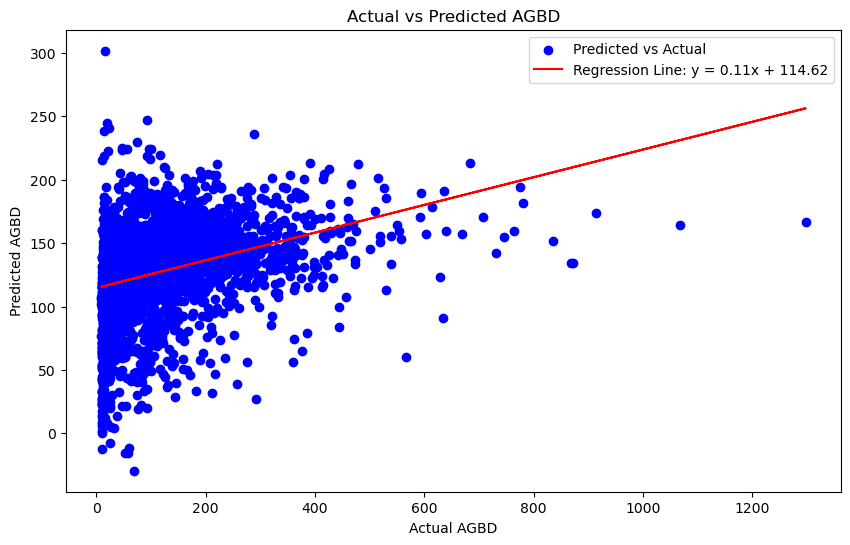

In [17]:
# 6. Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicted vs Actual')
# Plot regression line (y_pred vs y_test)
m, b = np.polyfit(y_test, y_pred_linear, 1)  # Fit a line to the test vs predicted values
plt.plot(y_test, m*y_test + b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')

plt.xlabel('Actual AGBD')
plt.ylabel('Predicted AGBD')
plt.title('Actual vs Predicted AGBD')
plt.legend()
plt.show()

## Random forest regression

In [18]:
# 1. Fit Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. predict on test data
y_pred_rf = rf_model.predict(X_test)

In [19]:
# 3. evaluate the perfomance
evaluate_performance(y_test, y_pred_rf, "Random Forest")


Performance of Random Forest:
R²: 0.2187
MAE: 71.4663
RMSE: 105.6177
Bias: 3.6311953696844617


(0.21868168617460626, 71.46634654397384, 105.6176820515286, 3.6311953696844617)

In [20]:
# 4. save the Random Forest model
joblib.dump(rf_model, 'rf_model_gedi_sentinel.joblib')

['rf_model_gedi_sentinel.joblib']

## Gradient Boosting

In [21]:
# 1. Fit Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# 2. predict on test data
y_pred_gb = gb_model.predict(X_test)

In [22]:
# 3. evaluate the perfomance
evaluate_performance(y_test, y_pred_gb, "Gradient Boosting")


Performance of Gradient Boosting:
R²: 0.2091
MAE: 72.1123
RMSE: 106.2611
Bias: 0.14886417762236


(0.20913333948191593, 72.11231919225303, 106.26108936525894, 0.14886417762236)

In [23]:
# 4. Menyimpan model Gradient Boosting
joblib.dump(gb_model, 'gb_model_gedi_sentinel.joblib')

['gb_model_gedi_sentinel.joblib']

## Support Vector Regression

In [24]:
# 1. Fit Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf')  # Using radial basis function (RBF) kernel
svr_model.fit(X_train, y_train)

# 2. predict on test data
y_pred_svr = svr_model.predict(X_test)

In [25]:
# 3. evaluate the perfomance
evaluate_performance(y_test, y_pred_svr, "Support Vector Regression")


Performance of Support Vector Regression:
R²: 0.0567
MAE: 76.9577
RMSE: 116.0489
Bias: -23.609716224718166


(0.056727683501010207,
 76.9577492068003,
 116.04893902962385,
 -23.609716224718166)

In [26]:
# 4. Menyimpan model SVR
joblib.dump(svr_model, 'svr_model_gedi_sentinel.joblib')

['svr_model_gedi_sentinel.joblib']

Visualiasi hasil ketiga model

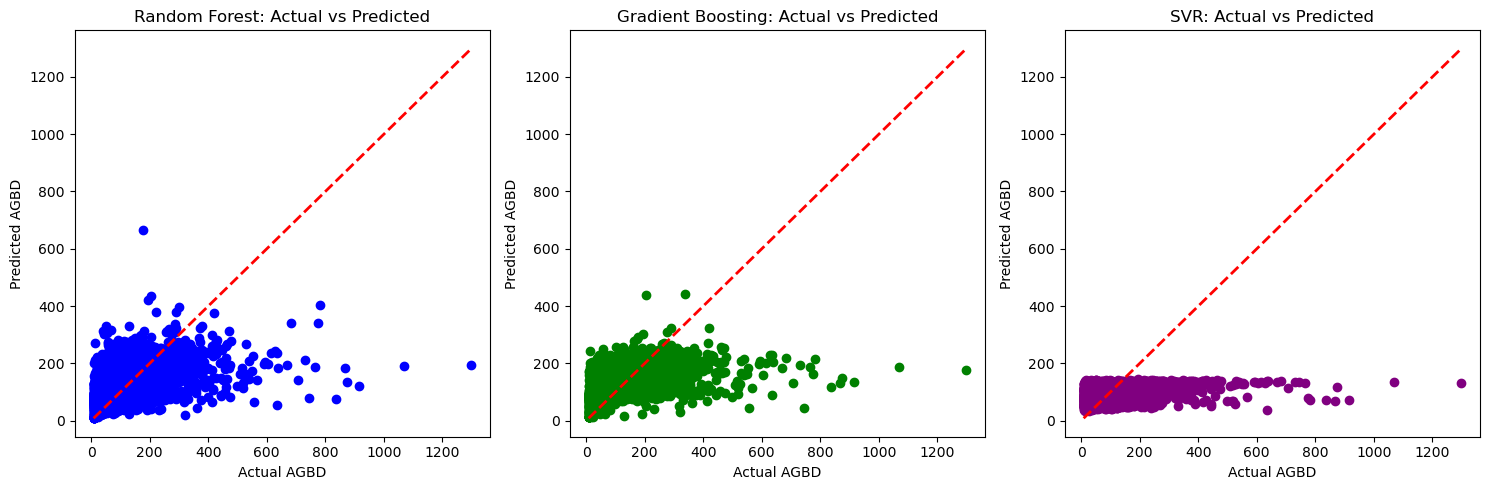

In [27]:
# Plotting actual vs predicted for each model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_rf, color='blue', label='RF Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual AGBD')
plt.ylabel('Predicted AGBD')
plt.title('Random Forest: Actual vs Predicted')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_gb, color='green', label='GB Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual AGBD')
plt.ylabel('Predicted AGBD')
plt.title('Gradient Boosting: Actual vs Predicted')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_svr, color='purple', label='SVR Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual AGBD')
plt.ylabel('Predicted AGBD')
plt.title('SVR: Actual vs Predicted')

plt.tight_layout()
plt.show()